<a href="https://colab.research.google.com/github/chebil/stat/blob/main/part2/ch04_random_variables.ipynb" target="_blank" rel="noopener noreferrer"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.1 Random Variables

Quite commonly, we would like to deal with **numbers that are random**. We can do so by linking numbers to the outcome of an experiment. 

A **random variable** is a function that assigns a number to each outcome of a random experiment. This simple idea is incredibly powerful—it lets us work with numbers instead of abstract outcomes.

---

## Definition 4.1: Discrete Random Variable

Given a sample space $\Omega$, a set of events $\mathcal{F}$, a probability function $P$, and a **countable** set of real numbers $\mathcal{D}$, a **discrete random variable** is a function with domain $\Omega$ and range $\mathcal{D}$.

This means that for any outcome $\omega$ there is a number $X(\omega)$.

$$X: \Omega \rightarrow \mathbb{R}$$

For each outcome $\omega \in \Omega$, $X(\omega)$ is a real number.

---

## Examples of Random Variables

### Example 4.1: Numbers from Coins

We flip a coin:
- Whenever the coin comes up **heads**, we report **1**
- When it comes up **tails**, we report **0**

This is a random variable.

### Example 4.2: Numbers from Coins II

We flip a coin **32 times**. We record a 1 when it comes up heads, and when it comes up tails, we record a 0. This produces a **32-bit random number**, which is a random variable.

### Example 4.3: The Number of Pairs in a Poker Hand

We draw a hand of five cards. The **number of pairs** in this hand is a random variable, which takes the values $\{0, 1, 2\}$ depending on which hand we draw.

### Example 4.4: Parity of Coin Flips

We flip a coin 32 times. We record a 1 when it comes up heads, and when it comes up tails, we record a 0. This produces a 32-bit random number, which is a random variable. The **parity** of this number is also a random variable.

**Key Point**: A function that takes a discrete random variable to a set of numbers is **also** a discrete random variable.

---

## Probability Distribution of Random Variables

Associated with any value $x$ of the random variable $X$ are a series of events. The most important is the set of outcomes $\omega$ such that $X(\omega) = x$, which we can write $\{\omega : X(\omega) = x\}$ (it is usual to simplify to $\{X = x\}$, and we will do so).

The probability that a random variable $X$ takes the value $x$ is given by $P(\{\omega : X(\omega) = x\})$, which is more usually written $P(\{X = x\})$. This is sometimes written as $P(X = x)$, and rather often written as $P(x)$.

### Definition 4.2: Probability Distribution

The **probability distribution** of a discrete random variable is the set of numbers $P(\{X = x\})$ for each value $x$ that $X$ can take. The distribution takes the value 0 at all other numbers.

Notice that the distribution is **non-negative**.

The probability distribution is sometimes known as the **probability mass function** (PMF).

### Definition 4.3: Cumulative Distribution

The **cumulative distribution** of a discrete random variable is the set of numbers $P(\{X \leq x\})$ for each value $x$ that $X$ can take.

Notice that this is a **non-decreasing** function of $x$.

---

## Worked Example 4.1: Numbers from Coins III

**Problem**: We flip a biased coin **2 times**. The flips are independent. The coin has $P(H) = p$, $P(T) = 1-p$. We record a 1 when it comes up heads, and when it comes up tails, we record a 0. This produces a **2-bit random number**, which is a random variable taking the values $\{0, 1, 2, 3\}$. What is the probability distribution and cumulative distribution of this random variable?

**Solution**: 

**Probability distribution**:
- $P(0) = (1-p)^2$
- $P(1) = (1-p)p$
- $P(2) = p(1-p)$
- $P(3) = p^2$

**Cumulative distribution**:
- $F(0) = (1-p)^2$
- $F(1) = (1-p)$
- $F(2) = (1-p)^2 + p(1-p) = (1-p)(2-p)$
- $F(3) = 1$

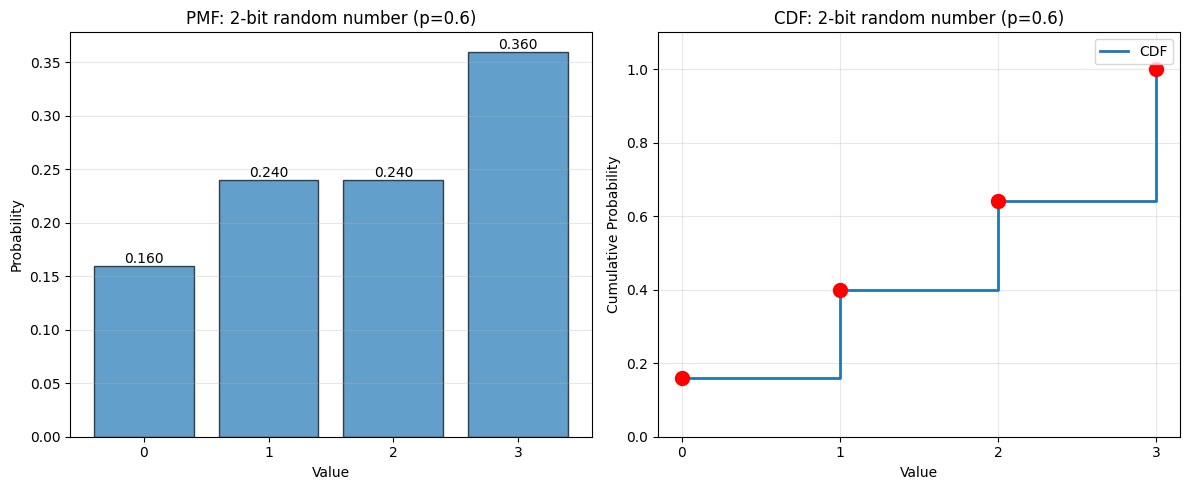

Probability Distribution:
  P(X = 0) = 0.1600
  P(X = 1) = 0.2400
  P(X = 2) = 0.2400
  P(X = 3) = 0.3600

Cumulative Distribution:
  F(0) = P(X ≤ 0) = 0.1600
  F(1) = P(X ≤ 1) = 0.4000
  F(2) = P(X ≤ 2) = 0.6400
  F(3) = P(X ≤ 3) = 1.0000


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example with p = 0.6
p = 0.6
values = [0, 1, 2, 3]

# PMF
pmf = [(1-p)**2, (1-p)*p, p*(1-p), p**2]

# CDF
cdf = [pmf[0], 
       pmf[0] + pmf[1],
       pmf[0] + pmf[1] + pmf[2],
       1.0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot PMF
ax1.bar(values, pmf, edgecolor='black', alpha=0.7)
ax1.set_xlabel('Value')
ax1.set_ylabel('Probability')
ax1.set_title(f'PMF: 2-bit random number (p={p})')
ax1.set_xticks(values)
ax1.grid(True, alpha=0.3, axis='y')

for i, (v, prob) in enumerate(zip(values, pmf)):
    ax1.text(v, prob, f'{prob:.3f}', ha='center', va='bottom')

# Plot CDF
ax2.step(values, cdf, where='post', linewidth=2, label='CDF')
ax2.scatter(values, cdf, color='red', s=100, zorder=5)
ax2.set_xlabel('Value')
ax2.set_ylabel('Cumulative Probability')
ax2.set_title(f'CDF: 2-bit random number (p={p})')
ax2.set_xticks(values)
ax2.set_ylim([0, 1.1])
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

print("Probability Distribution:")
for v, prob in zip(values, pmf):
    print(f"  P(X = {v}) = {prob:.4f}")

print("\nCumulative Distribution:")
for v, cum in zip(values, cdf):
    print(f"  F({v}) = P(X ≤ {v}) = {cum:.4f}")

---

## Worked Example 4.2: Betting on Coins

**Problem**: One way to get a random variable is to think about the **reward for a bet**. We agree to play the following game:
- I flip a coin with $P(H) = p$, $P(T) = 1-p$
- If the coin comes up **heads**, you pay me $q$
- If the coin comes up **tails**, I pay you $r$

The number of dollars that change hands is a random variable. What is its probability distribution?

**Solution**: We see this problem from **my perspective**:
- If the coin comes up heads, I get $q$
- If it comes up tails, I get $-r$

So we have:
$$P(X = q) = p \text{ and } P(X = -r) = (1-p)$$

and all other probabilities are zero.

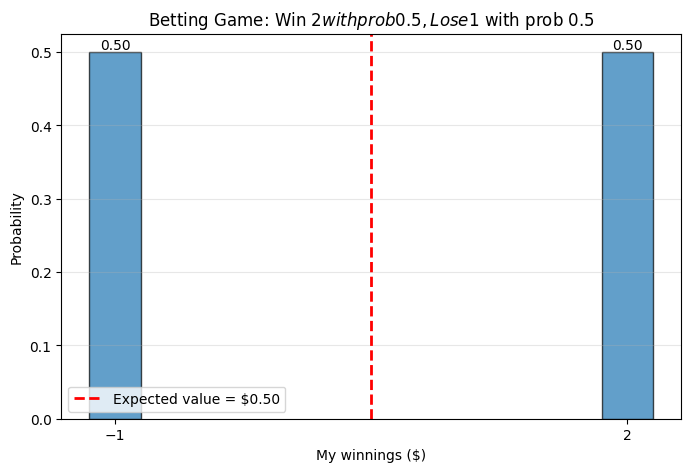

Expected value of my winnings = $0.50


In [2]:
# Betting game
p = 0.5  # Fair coin
q = 2    # I win 2 if heads
r = 1    # You win 1 if tails

outcomes = [q, -r]
probs = [p, 1-p]

plt.figure(figsize=(8, 5))
plt.bar(outcomes, probs, width=0.3, edgecolor='black', alpha=0.7)
plt.xlabel('My winnings ($)')
plt.ylabel('Probability')
plt.title(f'Betting Game: Win ${q} with prob {p}, Lose ${r} with prob {1-p}')
plt.xticks(outcomes)
plt.grid(True, alpha=0.3, axis='y')

for outcome, prob in zip(outcomes, probs):
    plt.text(outcome, prob, f'{prob:.2f}', ha='center', va='bottom')

# Expected value
expected = q*p + (-r)*(1-p)
plt.axvline(x=expected, color='red', linestyle='--', linewidth=2,
            label=f'Expected value = ${expected:.2f}')
plt.legend()
plt.show()

print(f"Expected value of my winnings = ${expected:.2f}")

---

## 4.1.1 Joint and Conditional Probability for Random Variables

All the concepts of probability that we described for events carry over to random variables. This is as it should be, because random variables are really just a way of getting numbers out of events. However, **terminology and notation change a bit**.

### Definition 4.4: Joint Probability Distribution

Assume we have two random variables $X$ and $Y$. The probability that $X$ takes the value $x$ **and** $Y$ takes the value $y$ could be written as $P(\{X = x\} \cap \{Y = y\})$. It is more usual to write it as:

$$P(x, y)$$

This is referred to as the **joint probability distribution** of the two random variables (or, quite commonly, the **joint**).

You can think of this as a **table of probabilities**, one for each possible pair of $x$ and $y$ values.

### Simplified Notation

Usually, we are interested in random variables, rather than potentially arbitrary outcomes or sets of outcomes. We will write:
- $P(X)$ to denote the probability distribution of a random variable
- $P(x)$ or $P(X = x)$ to denote the probability that random variable takes a particular value

This means that, for example, the rule we could write as:
$$P(\{X = x\} | \{Y = y\})P(\{Y = y\}) = P(\{X = x\} \cap \{Y = y\})$$

will be written as:
$$P(x|y)P(y) = P(x, y)$$

### Definition 4.5: Bayes Rule for Random Variables

Recall the rule from Section 3.4.1:
$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

This rule can be rewritten in our notation for random variables:

$$\boxed{P(x|y) = \frac{P(y|x)P(x)}{P(y)}}$$

---

### Important Properties

Random variables have another useful property. If $x_0 \neq x_1$, then the event $\{X = x_0\}$ must be **disjoint** from the event $\{X = x_1\}$. This means that:

$$\sum_x P(x) = 1$$

and that, for any $y$:

$$\sum_x P(x|y) = 1$$

---

## Definition 4.6: Marginal Probability

Write $P(x, y)$ for the joint probability distribution of two random variables $X$ and $Y$. Then:

$$P(x) = \sum_y P(x, y) = \sum_y P(\{X = x\} \cap \{Y = y\}) = P(\{X = x\})$$

is referred to as the **marginal probability distribution** of $X$.

**Intuition**: We "marginalize out" $Y$ by summing over all its possible values.

---

## Definition 4.7: Independent Random Variables

The random variables $X$ and $Y$ are **independent** if the events $\{X = x\}$ and $\{Y = y\}$ are independent for all values $x$ and $y$.

This means that:
$$P(\{X = x\} \cap \{Y = y\}) = P(\{X = x\})P(\{Y = y\})$$

which we can rewrite as:

$$\boxed{P(x, y) = P(x)P(y)}$$

**Equivalently**: $P(x|y) = P(x)$ for all $x, y$ (knowing $Y$ tells us nothing about $X$).

---

## Worked Example 4.3: Sums and Differences of Dice

**Problem**: You throw two dice. The number of spots on the first die is a random variable (call it $X$), so is the number of spots on the second die ($Y$). $X$ and $Y$ are independent. Now define:
- $S = X + Y$ (sum)
- $D = X - Y$ (difference)

What is the probability distribution of $S$ and of $D$?

**Solution**: 

**For $S$**: $S$ can have values in the range $\{2, 3, \ldots, 12\}$.
- There is only **one way** to get $S = 2$: $(1,1)$
- There are **two ways** to get $S = 3$: $(1,2), (2,1)$
- And so on...

Using the methods of Chapter 3 for each case, the probabilities for $2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12$ are:
$$\frac{1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1}{36}$$

**For $D$**: $D$ can have values in the range $\{-5, -4, \ldots, 4, 5\}$.

Again, using the methods of Chapter 3, the probabilities for $-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5$ are:
$$\frac{1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1}{36}$$

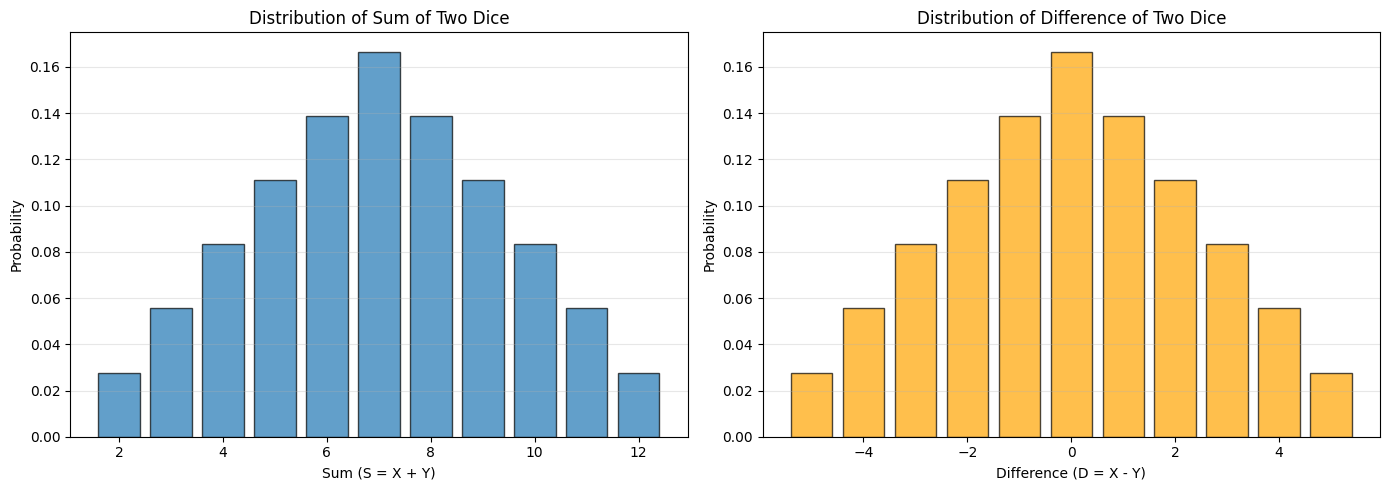

Distribution of S (sum):
  P(S =  2) = 1/36 = 0.0278
  P(S =  3) = 2/36 = 0.0556
  P(S =  4) = 3/36 = 0.0833
  P(S =  5) = 4/36 = 0.1111
  P(S =  6) = 5/36 = 0.1389
  P(S =  7) = 6/36 = 0.1667
  P(S =  8) = 5/36 = 0.1389
  P(S =  9) = 4/36 = 0.1111
  P(S = 10) = 3/36 = 0.0833
  P(S = 11) = 2/36 = 0.0556
  P(S = 12) = 1/36 = 0.0278

Distribution of D (difference):
  P(D = -5) = 1/36 = 0.0278
  P(D = -4) = 2/36 = 0.0556
  P(D = -3) = 3/36 = 0.0833
  P(D = -2) = 4/36 = 0.1111
  P(D = -1) = 5/36 = 0.1389
  P(D =  0) = 6/36 = 0.1667
  P(D =  1) = 5/36 = 0.1389
  P(D =  2) = 4/36 = 0.1111
  P(D =  3) = 3/36 = 0.0833
  P(D =  4) = 2/36 = 0.0556
  P(D =  5) = 1/36 = 0.0278


In [3]:
from itertools import product

# Two dice
dice_outcomes = list(product(range(1, 7), repeat=2))

# Compute S = X + Y
sums = [x + y for x, y in dice_outcomes]
sum_counts = {}
for s in range(2, 13):
    sum_counts[s] = sums.count(s)

# Compute D = X - Y
diffs = [x - y for x, y in dice_outcomes]
diff_counts = {}
for d in range(-5, 6):
    diff_counts[d] = diffs.count(d)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot S distribution
ax1.bar(sum_counts.keys(), [c/36 for c in sum_counts.values()], 
        edgecolor='black', alpha=0.7)
ax1.set_xlabel('Sum (S = X + Y)')
ax1.set_ylabel('Probability')
ax1.set_title('Distribution of Sum of Two Dice')
ax1.grid(True, alpha=0.3, axis='y')

# Plot D distribution
ax2.bar(diff_counts.keys(), [c/36 for c in diff_counts.values()],
        edgecolor='black', alpha=0.7, color='orange')
ax2.set_xlabel('Difference (D = X - Y)')
ax2.set_ylabel('Probability')
ax2.set_title('Distribution of Difference of Two Dice')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("Distribution of S (sum):")
for s, count in sum_counts.items():
    print(f"  P(S = {s:2d}) = {count}/36 = {count/36:.4f}")

print("\nDistribution of D (difference):")
for d, count in sorted(diff_counts.items()):
    print(f"  P(D = {d:2d}) = {count}/36 = {count/36:.4f}")

---

## Worked Example 4.4: Joint Distribution of S and D

**Problem**: Using the terminology of Example 4.3, what is the **joint probability distribution** of $S$ and $D$?

**Solution**: This is more interesting to display, because it's an $11 \times 11$ table. Each entry of the table represents a pair of $(S, D)$ values.

Many pairs **can't occur**:
- For example, for $S = 2$, $D$ can only be zero
- If $S$ is even, then $D$ must be even
- And so on

You can work out the table by checking each case.

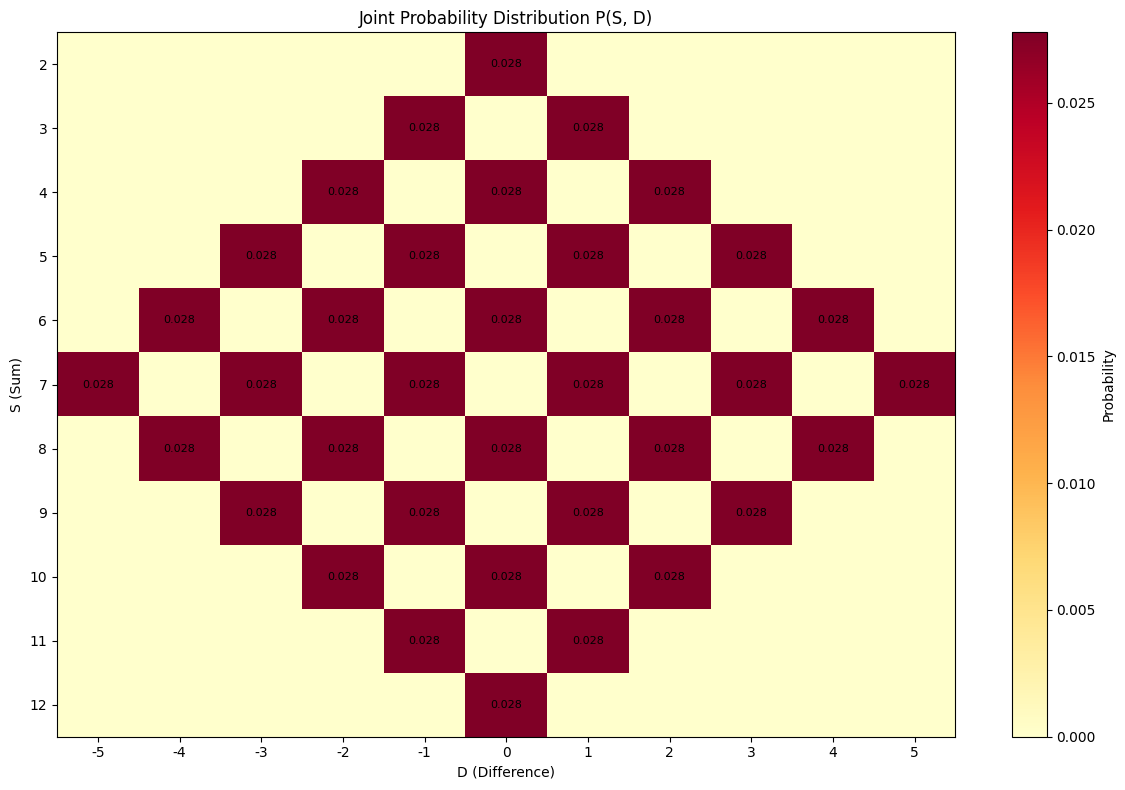

Joint Distribution Table (non-zero entries):
  P(S= 2, D= 0) = 0.0278
  P(S= 3, D=-1) = 0.0278
  P(S= 3, D= 1) = 0.0278
  P(S= 4, D=-2) = 0.0278
  P(S= 4, D= 0) = 0.0278
  P(S= 4, D= 2) = 0.0278
  P(S= 5, D=-3) = 0.0278
  P(S= 5, D=-1) = 0.0278
  P(S= 5, D= 1) = 0.0278
  P(S= 5, D= 3) = 0.0278
  P(S= 6, D=-4) = 0.0278
  P(S= 6, D=-2) = 0.0278
  P(S= 6, D= 0) = 0.0278
  P(S= 6, D= 2) = 0.0278
  P(S= 6, D= 4) = 0.0278
  P(S= 7, D=-5) = 0.0278
  P(S= 7, D=-3) = 0.0278
  P(S= 7, D=-1) = 0.0278
  P(S= 7, D= 1) = 0.0278
  P(S= 7, D= 3) = 0.0278
  P(S= 7, D= 5) = 0.0278
  P(S= 8, D=-4) = 0.0278
  P(S= 8, D=-2) = 0.0278
  P(S= 8, D= 0) = 0.0278
  P(S= 8, D= 2) = 0.0278
  P(S= 8, D= 4) = 0.0278
  P(S= 9, D=-3) = 0.0278
  P(S= 9, D=-1) = 0.0278
  P(S= 9, D= 1) = 0.0278
  P(S= 9, D= 3) = 0.0278
  P(S=10, D=-2) = 0.0278
  P(S=10, D= 0) = 0.0278
  P(S=10, D= 2) = 0.0278
  P(S=11, D=-1) = 0.0278
  P(S=11, D= 1) = 0.0278
  P(S=12, D= 0) = 0.0278


In [4]:
import pandas as pd

# Build joint distribution table
joint = {}
for x in range(1, 7):
    for y in range(1, 7):
        s = x + y
        d = x - y
        joint[(s, d)] = joint.get((s, d), 0) + 1/36

# Create DataFrame for visualization
S_values = range(2, 13)
D_values = range(-5, 6)
joint_matrix = np.zeros((len(S_values), len(D_values)))

for i, s in enumerate(S_values):
    for j, d in enumerate(D_values):
        joint_matrix[i, j] = joint.get((s, d), 0)

# Plot as heatmap
plt.figure(figsize=(12, 8))
plt.imshow(joint_matrix, cmap='YlOrRd', aspect='auto')
plt.colorbar(label='Probability')
plt.xlabel('D (Difference)')
plt.ylabel('S (Sum)')
plt.title('Joint Probability Distribution P(S, D)')
plt.xticks(range(len(D_values)), D_values)
plt.yticks(range(len(S_values)), S_values)

# Annotate cells with probabilities
for i in range(len(S_values)):
    for j in range(len(D_values)):
        if joint_matrix[i, j] > 0:
            plt.text(j, i, f'{joint_matrix[i, j]:.3f}', 
                    ha='center', va='center', color='black', fontsize=8)

plt.tight_layout()
plt.show()

print("Joint Distribution Table (non-zero entries):")
for (s, d), prob in sorted(joint.items()):
    if prob > 0:
        print(f"  P(S={s:2d}, D={d:2d}) = {prob:.4f}")

---

## Worked Example 4.5: Are S and D Independent?

**Problem**: Using the terminology of Example 4.3, are $X$ and $Y$ independent? Are $S$ and $D$ independent?

**Solution**: 

$X$ and $Y$ are **clearly independent** (outcomes of two different dice).

But $S$ and $D$ are **not independent**. There are several ways to see this:

1. **Notice that**: If you know $S = 2$, then you know the value of $D$ precisely ($D = 0$). But if you know $S = 3$, $D$ could be either $-1$ or $1$. This means that $P(D|S)$ depends on $S$, so they're not independent.

2. **Matrix rank**: The rank of the joint distribution table, as a matrix, is 6, which means that it **can't** be the outer product of two vectors (which would have rank 1).

3. **Check formula**: For independence, we need $P(S, D) = P(S)P(D)$ for all $(S, D)$ pairs. Let's check one:

In [5]:
# Check independence
# Pick S=7, D=1
s_val, d_val = 7, 1

# P(S=7, D=1)
p_s_and_d = joint.get((s_val, d_val), 0)

# P(S=7)
p_s = sum_counts[s_val] / 36

# P(D=1)
p_d = diff_counts[d_val] / 36

# P(S) * P(D)
p_s_times_p_d = p_s * p_d

print(f"Testing independence for S={s_val}, D={d_val}:")
print(f"  P(S={s_val}, D={d_val}) = {p_s_and_d:.4f}")
print(f"  P(S={s_val}) = {p_s:.4f}")
print(f"  P(D={d_val}) = {p_d:.4f}")
print(f"  P(S) × P(D) = {p_s_times_p_d:.4f}")
print(f"\n  Independent? {np.isclose(p_s_and_d, p_s_times_p_d)}")

Testing independence for S=7, D=1:
  P(S=7, D=1) = 0.0278
  P(S=7) = 0.1667
  P(D=1) = 0.1389
  P(S) × P(D) = 0.0231

  Independent? False


---

## Worked Example 4.6: Conditional Probabilities

**Problem**: Using the terminology of Example 4.3, what is $P(S|D = 0)$? What is $P(D|S = 11)$?

**Solution**: You could work out either of these from the table, or by first principles.

**Part 1**: If $D = 0$, then $X = Y$. So $S$ can have values $\{2, 4, 6, 8, 10, 12\}$, and each value has conditional probability $\frac{1}{6}$.

**Part 2**: If $S = 11$, then either:
- $X = 5, Y = 6$ (so $D = -1$), or
- $X = 6, Y = 5$ (so $D = 1$)

Each value has conditional probability $\frac{1}{2}$.

In [6]:
# P(S | D=0)
d_0_outcomes = [(x, y) for x, y in dice_outcomes if x - y == 0]
print(f"When D=0, possible outcomes: {d_0_outcomes}")
print(f"Sums when D=0: {[x+y for x,y in d_0_outcomes]}")
print(f"P(S | D=0): Each of {set([x+y for x,y in d_0_outcomes])} has probability 1/6\n")

# P(D | S=11)
s_11_outcomes = [(x, y) for x, y in dice_outcomes if x + y == 11]
print(f"When S=11, possible outcomes: {s_11_outcomes}")
print(f"Differences when S=11: {[x-y for x,y in s_11_outcomes]}")
print(f"P(D | S=11): Each of {set([x-y for x,y in s_11_outcomes])} has probability 1/2")

When D=0, possible outcomes: [(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6)]
Sums when D=0: [2, 4, 6, 8, 10, 12]
P(S | D=0): Each of {2, 4, 6, 8, 10, 12} has probability 1/6

When S=11, possible outcomes: [(5, 6), (6, 5)]
Differences when S=11: [-1, 1]
P(D | S=11): Each of {1, -1} has probability 1/2


---

## 4.1.2 Just a Little Continuous Probability

Our random variables take values from a **discrete** set of numbers $\mathcal{D}$. This makes the underlying machinery somewhat simpler to describe, and is often, but not always, enough for model building.

Some phenomena are more naturally modelled as being **continuous**, for example:
- Human height
- Human weight  
- The mass of a distant star
- And so on

Giving a complete formal description of probability on a continuous space is surprisingly tricky. These issues are caused by two interrelated facts:
1. Real numbers have **infinite precision**
2. You **can't count** real numbers

### Continuous Random Variables

A **continuous random variable** is still a random variable, and comes with all the stuff that a random variable comes with. We will not speculate on what the underlying sample space is, nor on the underlying events.

The most interesting thing for us is specifying the **probability distribution**. Rather than talk about the probability that a real number takes a particular value (which we can't really do satisfactorily most of the time), we will instead talk about the **probability that it lies in some interval**.

---

## Probability Density Functions (PDF)

So we can specify a probability distribution for a continuous random variable by giving a set of very small intervals, and for each interval providing the probability that the random variable lies in this interval. The easiest way to do this is to supply a **probability density function**.

Let $p(x)$ be a probability density function (often called a **pdf** or **density**) for a continuous random variable $X$. We interpret this function by thinking in terms of small intervals.

Assume that $dx$ is an **infinitesimally small interval**. Then:

$$p(x)dx = P(\{\text{event that } X \text{ takes a value in the range } [x, x + dx]\})$$

---

## Useful Facts 4.1: Properties of Probability Density Functions

1. **Non-negative**: Probability density functions are non-negative. This follows from the definition—a negative value at some $u$ would imply that $P(\{x \in [u, u + du]\})$ was negative, and this cannot occur.

2. **Integration gives probability**: For $a < b$:
   $$P(\{X \text{ takes a value in the range } [a, b]\}) = \int_a^b p(x)dx$$
   which we obtain by summing $p(x)dx$ over all the infinitesimal intervals between $a$ and $b$.

3. **Normalizes to 1**: We must have that:
   $$\int_{-\infty}^{\infty} p(x)dx = 1$$
   This is because:
   $$P(\{X \text{ takes a value in the range } [-\infty, \infty]\}) = 1$$

### Normalizing

The property that $\int_{-\infty}^{\infty} p(x)dx = 1$ is useful, because when we are trying to determine a probability density function, we can **ignore a constant factor**.

So if $g(x)$ is a non-negative function that is **proportional** to the probability density function (often pdf) we are interested in, we can recover the pdf by computing:

$$p(x) = \frac{1}{\int_{-\infty}^{\infty} g(x)dx} \cdot g(x)$$

This procedure is sometimes known as **normalizing**, and $\int_{-\infty}^{\infty} g(x)dx$ is the **normalizing constant**.

---

## The Histogram Perspective

One good way to think about pdfs is as **the limit of a histogram**. Imagine you:

1. Collect an arbitrarily large dataset of data items, each of which is independent
2. Build a histogram of that dataset, using arbitrarily narrow boxes
3. Scale the histogram so that the sum of the box areas is one

The result is a probability density function.

The pdf doesn't represent the probability that a random variable takes a value. Instead, you should think of $p(x)$ as being the **limit of a ratio**:

$$p(x) = \lim_{\text{small interval}} \frac{\text{probability that the random variable will lie in a small interval centered on } x}{\text{length of the small interval centered on } x}$$

(which is why it's called a **density**)

Notice that, while a pdf has to be:
- **Non-negative**
- **Integrate to 1**

it does **not** have to be smaller than one. A ratio like this could be a lot larger than one, as long as it isn't larger than one for too many $x$ (because the integral must be one).

---

## Worked Example 4.7: A PDF Larger than One

**Problem**: Assume we have a physical system that can produce random numbers. It produces numbers in the range $[0, \epsilon]$, where $0 < \epsilon < 1$. Each number has the **same probability** of appearing. No number larger than $\epsilon$ or smaller than $0$ can ever appear. What is the probability density function?

**Solution**: Write $p(x)$ for the probability density function. We must have that:
- $p(x) = 0$ for $x < 0$
- $p(x) = 0$ for $x > \epsilon$
- $p(x)$ is constant between $0$ and $\epsilon$
- $\int_{-\infty}^{\infty} p(x)dx = 1$

So:
$$p(x) = \begin{cases}
0 & \text{if } x < 0 \\
\frac{1}{\epsilon} & \text{if } 0 \leq x \leq \epsilon \\
0 & \text{if } x > \epsilon
\end{cases}$$

**Notice** that if $\epsilon < 1$, we have that $p(x) > 1$ for all $x$ in $[0, \epsilon]$!

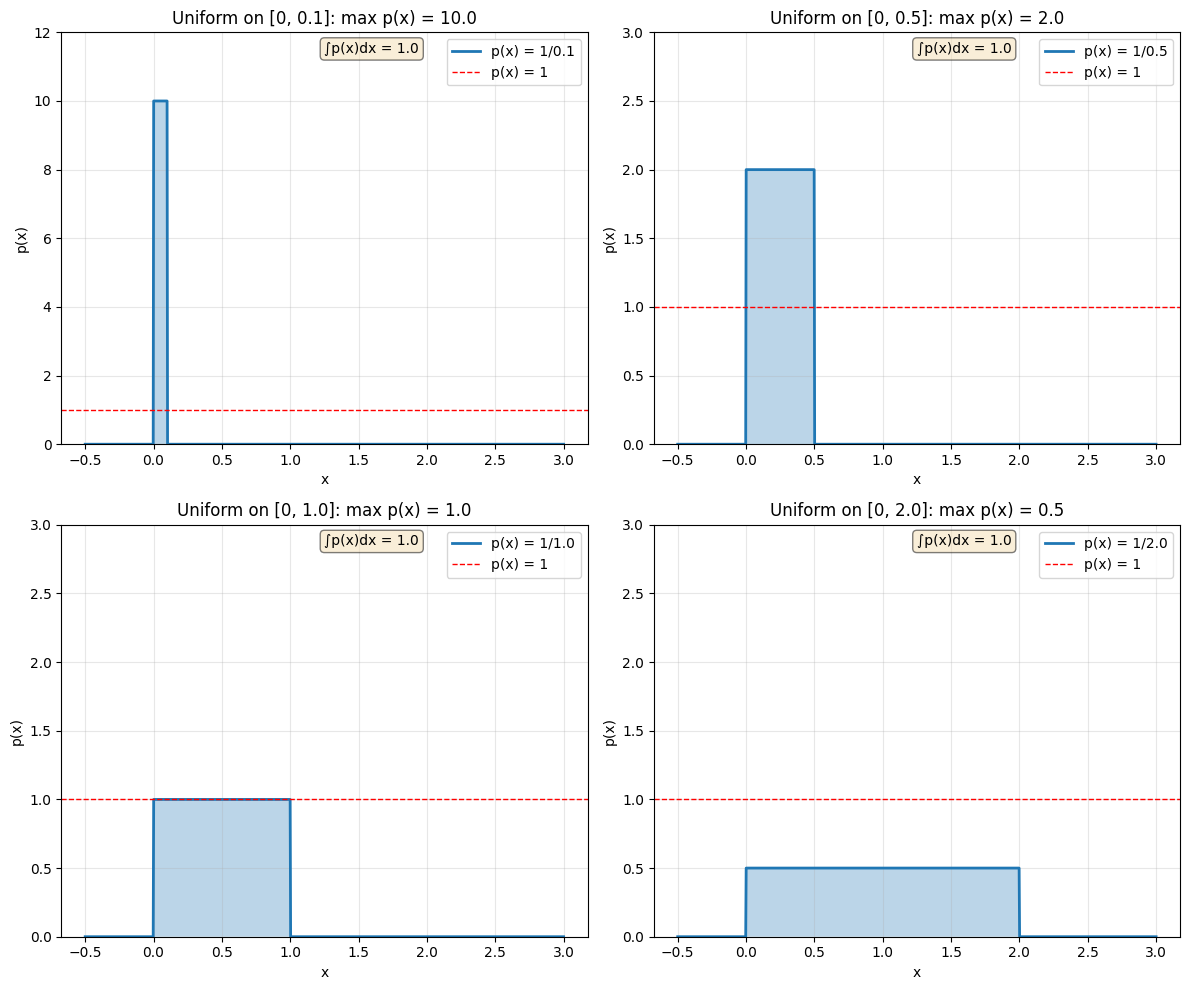

In [7]:
# PDF larger than 1
epsilons = [0.1, 0.5, 1.0, 2.0]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for idx, eps in enumerate(epsilons):
    x = np.linspace(-0.5, 3, 1000)
    pdf = np.where((x >= 0) & (x <= eps), 1/eps, 0)
    
    axes[idx].plot(x, pdf, linewidth=2, label=f'p(x) = 1/{eps:.1f}')
    axes[idx].fill_between(x, 0, pdf, alpha=0.3)
    axes[idx].axhline(y=1, color='red', linestyle='--', linewidth=1, 
                      label='p(x) = 1')
    axes[idx].set_xlabel('x')
    axes[idx].set_ylabel('p(x)')
    axes[idx].set_title(f'Uniform on [0, {eps}]: max p(x) = {1/eps:.1f}')
    axes[idx].set_ylim([0, max(3, 1.2/eps)])
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend()
    
    # Verify integral = 1
    integral = eps * (1/eps)
    axes[idx].text(0.5, 0.95, f'∫p(x)dx = {integral:.1f}', 
                  transform=axes[idx].transAxes, 
                  bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

---

## Important Note on Notation

```{admonition} Remember This
:class: warning
Probability notation can be **quirky**:

1. Usually, one uses a **big $P$** for actual probabilities, and a **small $p$** for probability densities

2. The argument, or context, is supposed to tell you which probability distribution is meant (i.e., $P(X)$ likely refers to a different probability distribution than $P(Y)$, which should strike a computer scientist familiar with dummy variables as bizarre)

3. Because the probability distribution for a discrete random variable is a collection of probabilities, following this convention requires that such a probability distribution be written with a big $P$. However, having different notation for discrete and continuous random variables can get quite clunky.

4. In application areas it is usual to write a **small $p$** for a probability distribution, and whether a density or a distribution is intended depends on whether the random variable is continuous or discrete.

5. If you want to emphasize that a probability is intended, you can write $P$.

6. You may encounter:
   - $p(x)$ with the meaning "some probability distribution"
   - $p(x)$ meaning the value of the probability distribution $P(\{X = x\})$ at the point $x$
   - $p(x)$ with the meaning the probability distribution $P(\{X = x\})$ as a function of $x$

7. Cumulative distributions are often written with an $F$, so that an unexpected $F(x)$ might mean $P(\{X \leq x\})$.

You can usually figure out what is intended—as long as you don't think too closely about it (authors are often quite inconsistent; context may help disambiguate different intended meanings, too).
```

---

## Summary

### Key Concepts

1. **Random variables** map outcomes to numbers: $X: \Omega \rightarrow \mathbb{R}$
2. **Discrete RVs** have probability mass functions (PMF): $P(X = x)$
3. **Continuous RVs** have probability density functions (PDF): $p(x)$
4. **Joint probability** describes multiple RVs: $P(x, y)$
5. **Marginal probability**: $P(x) = \sum_y P(x, y)$
6. **Conditional probability**: $P(x|y) = \frac{P(x,y)}{P(y)}$
7. **Independence**: $P(x, y) = P(x)P(y)$
8. For continuous RVs: $P(X = x) = 0$ for any specific $x$
9. PDFs can be **greater than 1**!

### Important Formulas

| Formula | Description |
|---------|-------------|
| $P(x) = \sum_y P(x, y)$ | Marginalization |
| $P(x|y) = \frac{P(y|x)P(x)}{P(y)}$ | Bayes' rule |
| $P(x, y) = P(x)P(y)$ | Independence |
| $P(a \leq X \leq b) = \int_a^b p(x)dx$ | Probability from PDF |
| $\int_{-\infty}^{\infty} p(x)dx = 1$ | PDF normalization |

---

## Practice Problems

1. **Discrete RV**: Define random variable $X$ = number of heads in 3 coin flips. Find the complete PMF $P(X = k)$ for all $k$.

2. **Independence**: For two dice, define $X$ = first die, $Y$ = second die, $Z = X + Y$. Are $X$ and $Z$ independent? Prove your answer.

3. **Uniform distribution**: If $X$ is uniform on $[0, 10]$, find:
   - $P(3 \leq X \leq 7)$
   - The PDF $p(x)$
   - Verify that the PDF can be greater than 1 for some uniform distributions

4. **Joint distribution**: Two coins are flipped. $X$ = number of heads on first coin, $Y$ = number of heads on second coin. Write out the complete joint distribution $P(X, Y)$.

5. **Conditional**: You roll a die. $X$ = the outcome. Given that $X$ is even, what is $P(X = 2 | X \text{ is even})$?

---

## Next Steps

Now that we understand random variables and their distributions, we can:

1. Define **expected values** and explore properties of expectations
2. Study important **discrete distributions** (Bernoulli, Binomial, Poisson)
3. Study important **continuous distributions** (Uniform, Exponential, Normal)
4. Apply the **weak law of large numbers**

→ Continue to [4.2 Expectations and Expected Values](ch04_expectations.md)

→ Return to [Chapter 4 Overview](chapter04.md)